### Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# Visual overview

In [115]:
# load data
df = pd.read_csv('results.csv')
df.head()

,Age,English level,Education Level,Computing Experience,Task,Selected Answer,Correct,Case Type,Time Taken (ms),Submission Timestamp
0,23,esl,undergraduate,advanced,monitor cpu usage,monitor-cpu-usage,True,kebab,26919,Tue Dec 03 2024 17:47:56 GMT+0000 (Coordinated...
1,23,esl,undergraduate,advanced,install software package,installSoftwarePackage,True,camel,20836,Tue Dec 03 2024 17:47:56 GMT+0000 (Coordinated...
2,23,esl,undergraduate,advanced,manage firewall rules,manageFirewallRules,True,camel,16048,Tue Dec 03 2024 17:47:56 GMT+0000 (Coordinated...
3,23,esl,undergraduate,advanced,backup database files,backupDatabaseFiles,True,camel,9786,Tue Dec 03 2024 17:47:56 GMT+0000 (Coordinated...
4,23,esl,undergraduate,advanced,configure network interface,configureNetworkInterface,True,camel,9116,Tue Dec 03 2024 17:47:56 GMT+0000 (Coordinated...


In [116]:
# prepate Timestamp field
df['Submission Timestamp'] = pd.to_datetime(df['Submission Timestamp'], format='%a %b %d %Y %H:%M:%S GMT%z (Coordinated Universal Time)')

# count unique users (Age, English level, Education Level, Computing Experience and Submission Timestamp should be the same)
df['user'] = df['Age'].astype(str) + df['English level'] + df['Education Level'] + df['Computing Experience'] + df['Submission Timestamp'].astype(str)
df['user'] = df['user'].apply(lambda x: hash(x))
df['user'] = df['user'].astype(str)
print('Unique users:', len(df['user'].unique()))

Unique users: 21


In [117]:
number_of_tests_per_user = df.shape[0] / df['user'].nunique()
print('Number of tests per user:', int(number_of_tests_per_user))

Number of tests per user: 30


---

### Outliers check

In [118]:
df_test = df.copy()
# Sort by time taken
df_test = df_test.sort_values(by='Time Taken (ms)', ascending=False)
df_test = df_test.reset_index(drop=True)
# Top 5 unique slowest users
df_test.head(5)

,Age,English level,Education Level,Computing Experience,Task,Selected Answer,Correct,Case Type,Time Taken (ms),Submission Timestamp,user
0,16,efl,hs,moderate,monitor cpu usage,monitor-cpu-usage,True,kebab,52166,2024-12-03 19:47:32+00:00,-5163013596131270560
1,23,efl,undergraduate,moderate,monitor cpu usage,monitor-cpu-usage,True,kebab,43185,2024-12-03 17:58:41+00:00,-2038536704126433573
2,20,efl,undergraduate,advanced,monitor cpu usage,monitor-cpu-usage,True,kebab,40184,2024-12-12 16:53:07+00:00,-3655450482603961718
3,23,efl,undergraduate,moderate,run diagnostic tests,run-diagnostic-tests,True,kebab,28959,2024-12-03 17:58:41+00:00,-2038536704126433573
4,23,esl,undergraduate,advanced,monitor cpu usage,monitor-cpu-usage,True,kebab,26919,2024-12-03 17:47:56+00:00,6074148900123643700


*These users may have started the test without looking at the manuals*

In [119]:
df_test.tail(5)

,Age,English level,Education Level,Computing Experience,Task,Selected Answer,Correct,Case Type,Time Taken (ms),Submission Timestamp,user
625,19,efl,undergraduate,advanced,enable network settings,disableWokeSettings,False,camel,332,2024-12-03 21:53:55+00:00,7229947503828059969
626,19,efl,undergraduate,advanced,upload data to server,uploadDataTooSever,False,camel,299,2024-12-03 21:53:55+00:00,7229947503828059969
627,19,efl,undergraduate,advanced,compress large files,compress-lake-file,False,kebab,247,2024-12-03 21:53:55+00:00,7229947503828059969
628,19,efl,undergraduate,advanced,create user account,create-user-account,True,kebab,232,2024-12-03 21:53:55+00:00,7229947503828059969
629,19,efl,undergraduate,advanced,install software package,install-software-jacked,False,kebab,44,2024-12-03 21:53:55+00:00,7229947503828059969


*Such instantaneous responses could be indicative of choosing an answer at random*

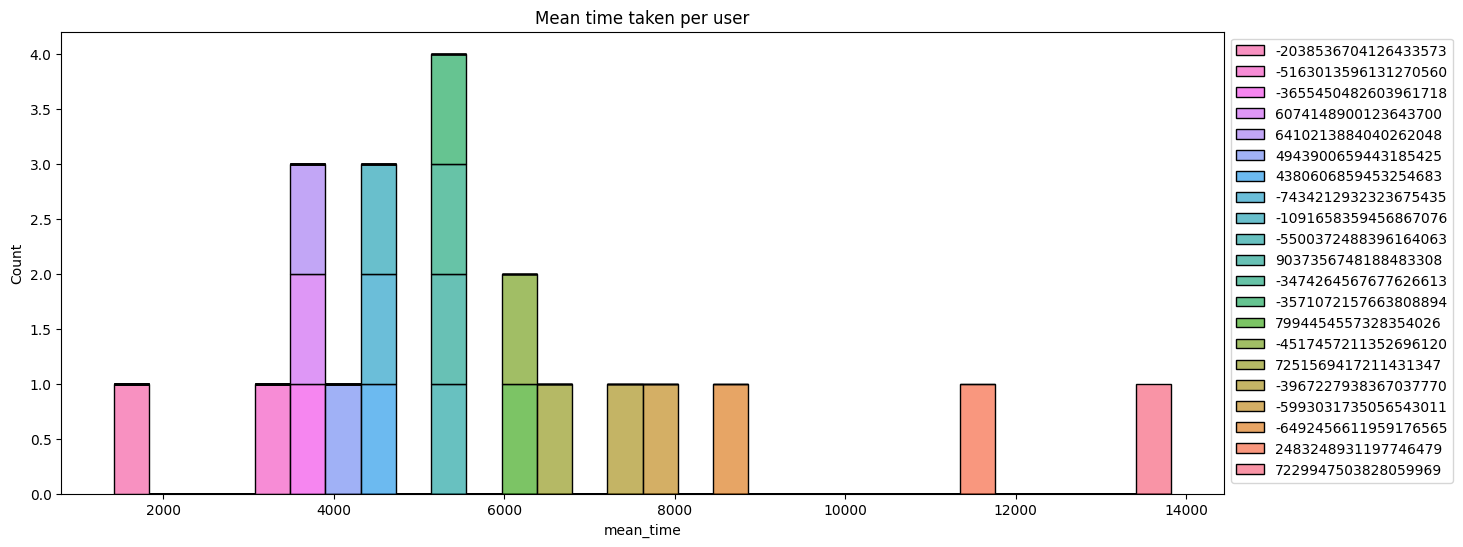

In [131]:
# display mean time taken for each user
df_mean = df.groupby('user').agg({'Time Taken (ms)': 'mean'}).reset_index()
df_mean.columns = ['user', 'mean_time']
df_mean = df_mean.sort_values(by='mean_time', ascending=False)

plt.figure(figsize=(15, 6))
sns.histplot(df_mean, x='mean_time', bins=30, hue='user', multiple='stack')
plt.title('Mean time taken per user')
plt.legend(df_mean['user'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [132]:
# remove outliers
df = df[df['user'] != '7229947503828059969']
df = df[df['user'] != '-2038536704126433573']
df = df[df['user'] != '-5163013596131270560']
df = df[df['user'] != '-3655450482603961718']

Although such a solution will cost as much as 19% of the data, but a closer look shows that the users were too irresponsible in their testing.

---

### Demographic data

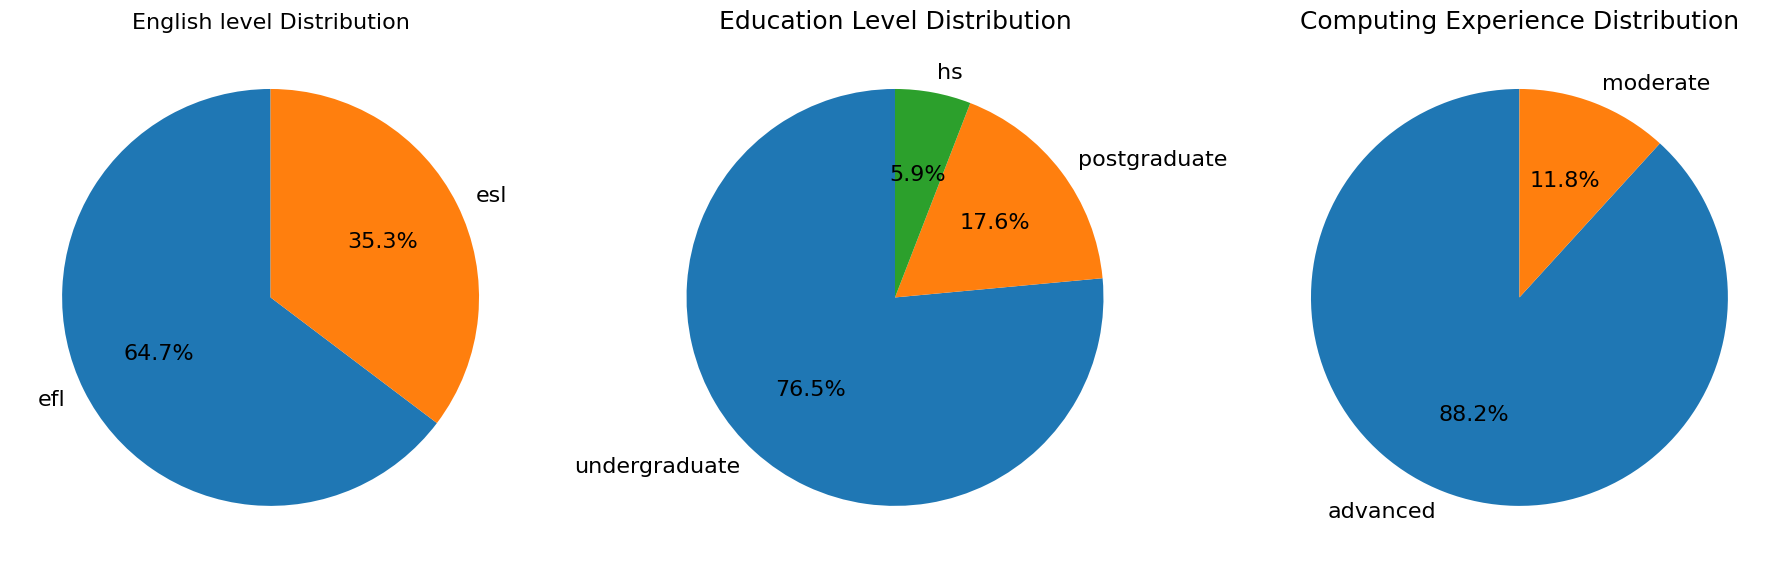

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

df['English level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0], textprops={'fontsize': 16})
axes[0].set_title('English level Distribution', fontsize=16)
axes[0].set_ylabel('')

df['Education Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1], textprops={'fontsize': 16})
axes[1].set_title('Education Level Distribution', fontsize=18)
axes[1].set_ylabel('')

df['Computing Experience'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[2], textprops={'fontsize': 16})
axes[2].set_title('Computing Experience Distribution', fontsize=18)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


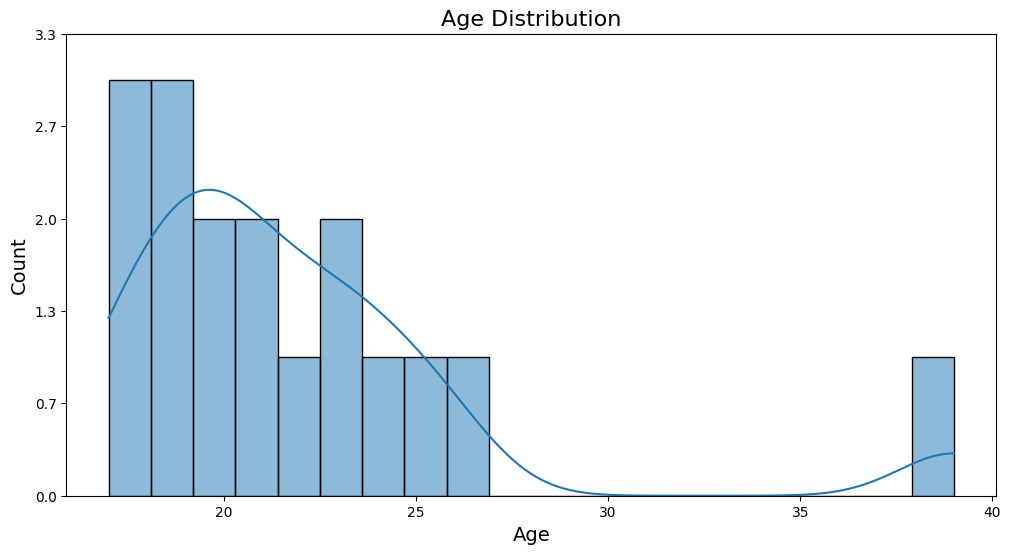

In [136]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
y_vals = plt.gca().get_yticks()
plt.gca().set_yticks(y_vals)
plt.gca().set_yticklabels([f'{y / number_of_tests_per_user:.1f}' for y in y_vals])
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

---

### General for Case Type

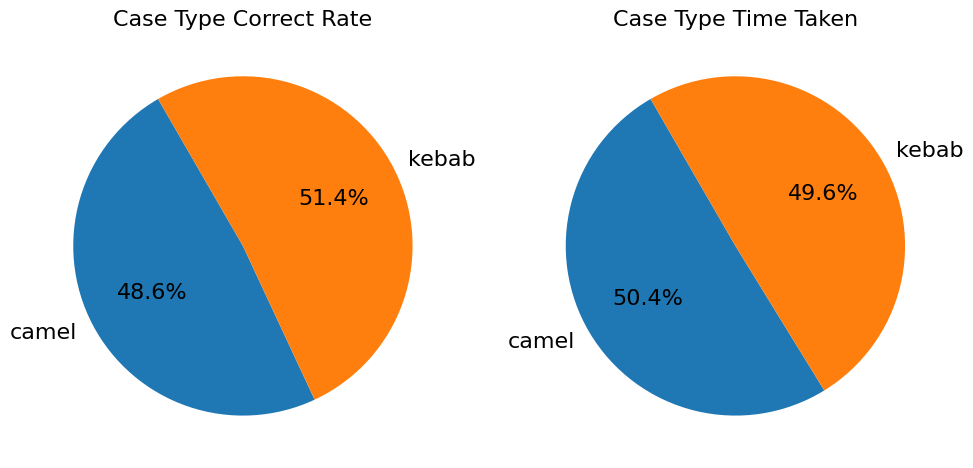

In [137]:
# Display Case type and their correct rate
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df.groupby('Case Type')['Correct'].mean().plot.pie(autopct='%1.1f%%', startangle=120, ax=axes[0], textprops={'fontsize': 16})
axes[0].set_title('Case Type Correct Rate', fontsize=16)
axes[0].set_ylabel('')

df.groupby('Case Type')['Time Taken (ms)'].mean().plot.pie(autopct='%1.1f%%', startangle=120, ax=axes[1], textprops={'fontsize': 16})
axes[1].set_title('Case Type Time Taken', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


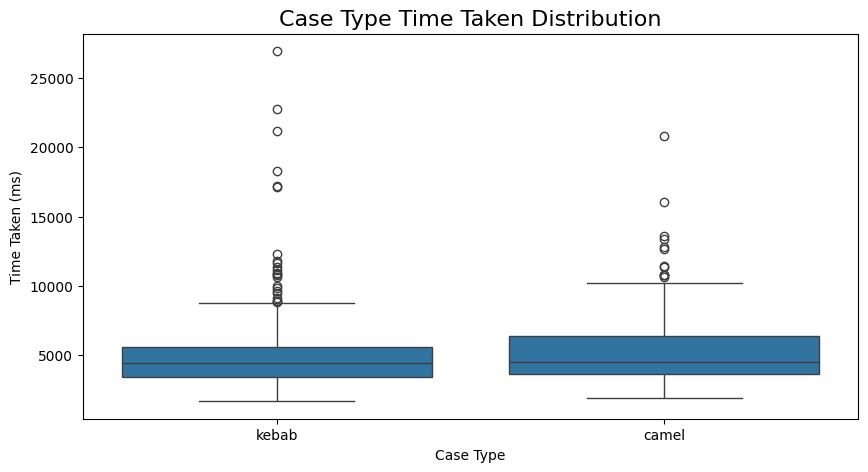

In [138]:
# Display Case type and their min, max, mean time taken
plt.figure(figsize=(10, 5))
sns.boxplot(x='Case Type', y='Time Taken (ms)', data=df)
plt.title('Case Type Time Taken Distribution', fontsize=16)
plt.show()

---

### Tasks

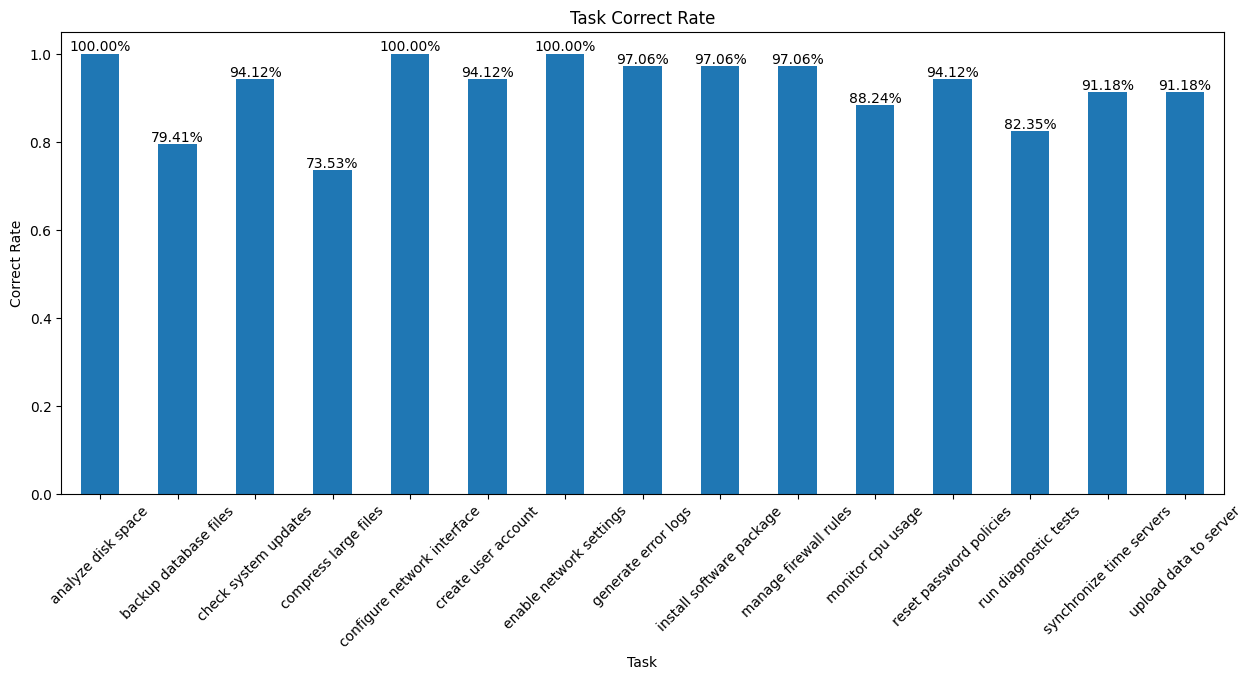

In [174]:
# Display Tasks and their correct rate
df['Correct'] = df['Correct'].astype(int)
plt.figure(figsize=(15, 6))
df.groupby('Task')['Correct'].mean().plot.bar()
plt.title('Task Correct Rate')
plt.xlabel('Task')
plt.ylabel('Correct Rate')
plt.xticks(rotation=45)

df_correct_rate = df.groupby('Task')['Correct'].mean()
for i, (task, rate) in enumerate(df_correct_rate.items()):
  plt.annotate(f'{rate:.2%}', xy=(i, rate), ha='center', va='bottom')

plt.show()

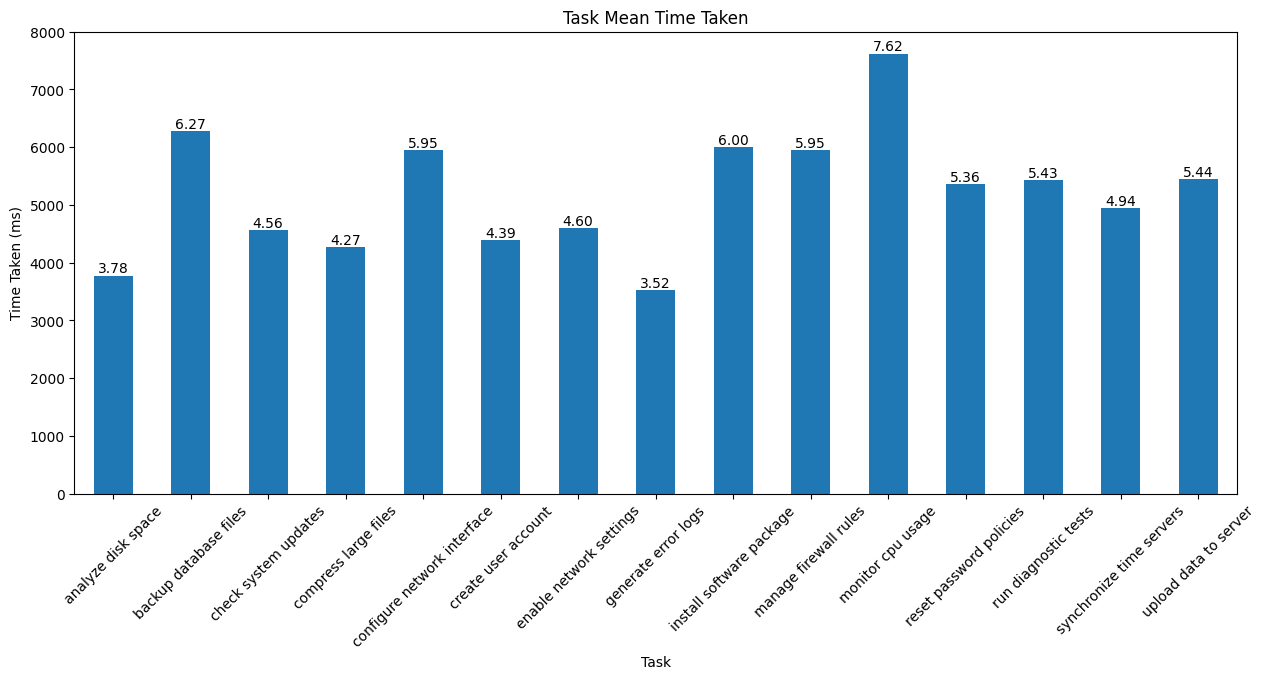

In [176]:
# Display Tasks and their time taken (ms)
plt.figure(figsize=(15, 6))
df.groupby('Task')['Time Taken (ms)'].mean().plot.bar()
plt.title('Task Mean Time Taken')
plt.xlabel('Task')
plt.ylabel('Time Taken (ms)')
plt.xticks(rotation=45)

df_time_taken = df.groupby('Task')['Time Taken (ms)'].mean()
for i, (task, time) in enumerate(df_time_taken.items()):
  plt.annotate(f'{time / 1000:.2f}', xy=(i, time), ha='center', va='bottom')

plt.show()

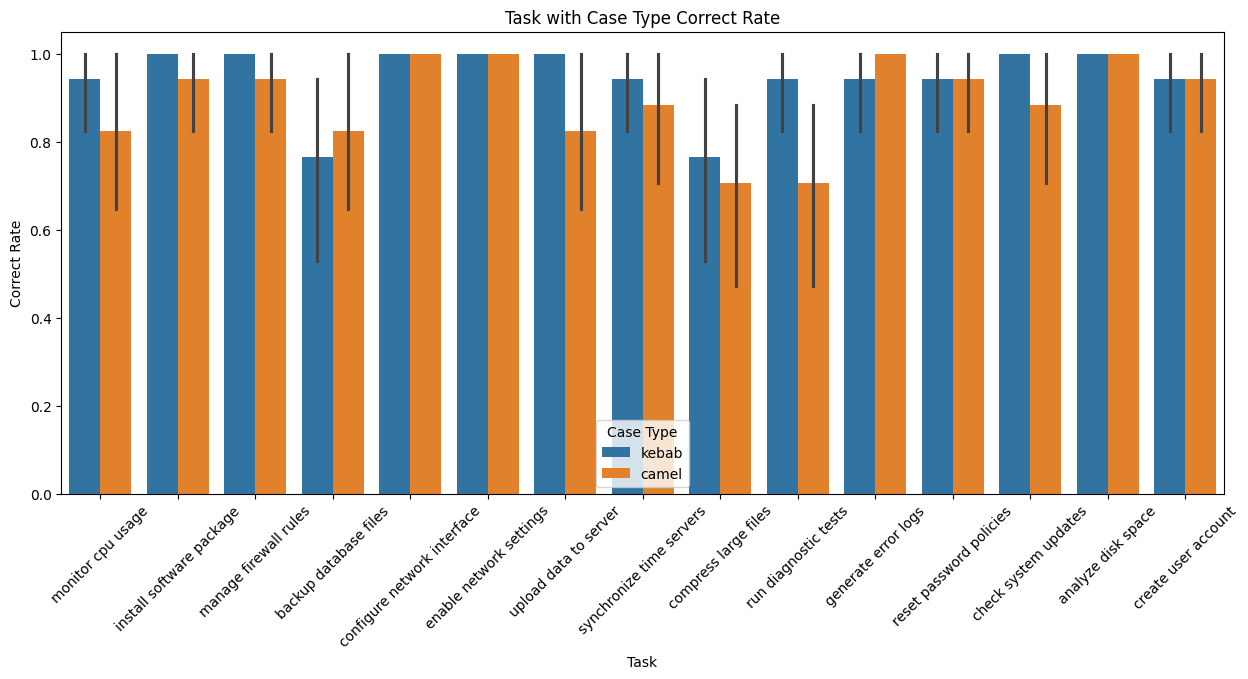

In [141]:
# Display Tasks with Case Type and their correct rate
plt.figure(figsize=(15, 6))
sns.barplot(x='Task', y='Correct', hue='Case Type', data=df)
plt.title('Task with Case Type Correct Rate')
plt.xlabel('Task')
plt.ylabel('Correct Rate')
plt.xticks(rotation=45)
plt.legend(title='Case Type')
plt.show()

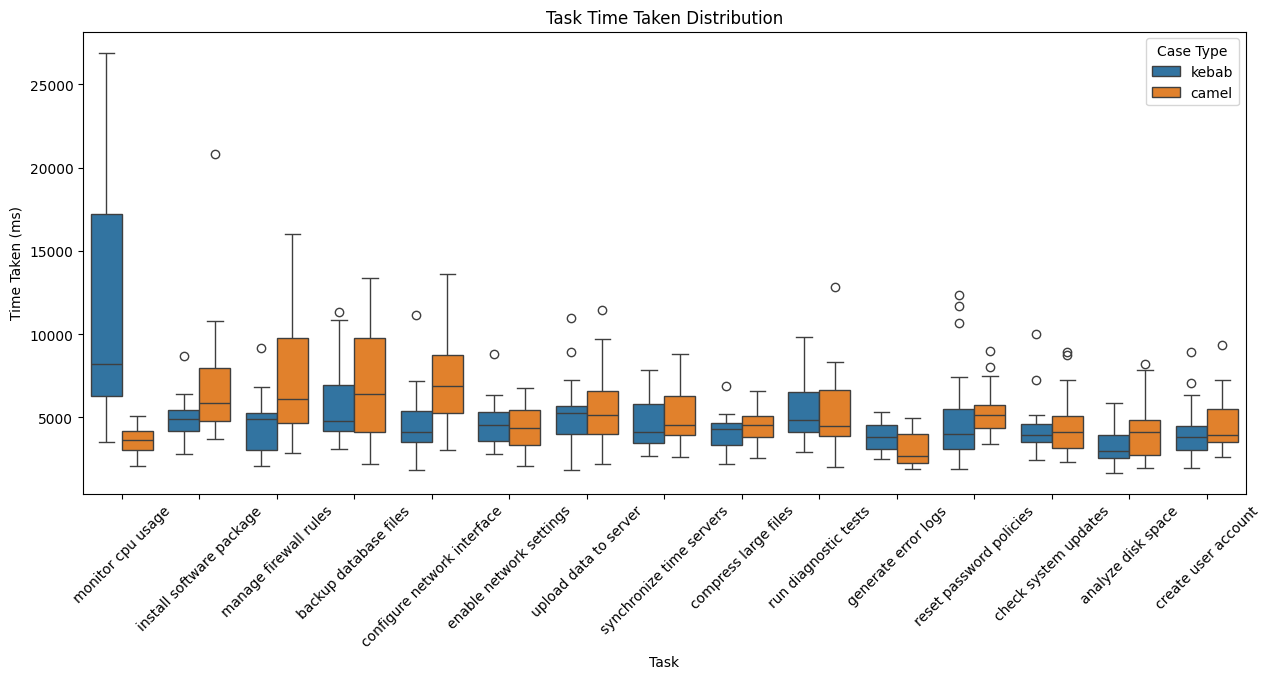

In [142]:
# Display Tasks with Case type and time taken (min, max, mean)
plt.figure(figsize=(15, 6))
sns.boxplot(x='Task', y='Time Taken (ms)', hue='Case Type', data=df)
plt.title('Task Time Taken Distribution')
plt.xlabel('Task')
plt.ylabel('Time Taken (ms)')
plt.xticks(rotation=45)
plt.legend(title='Case Type')
plt.show()

---

### Answers

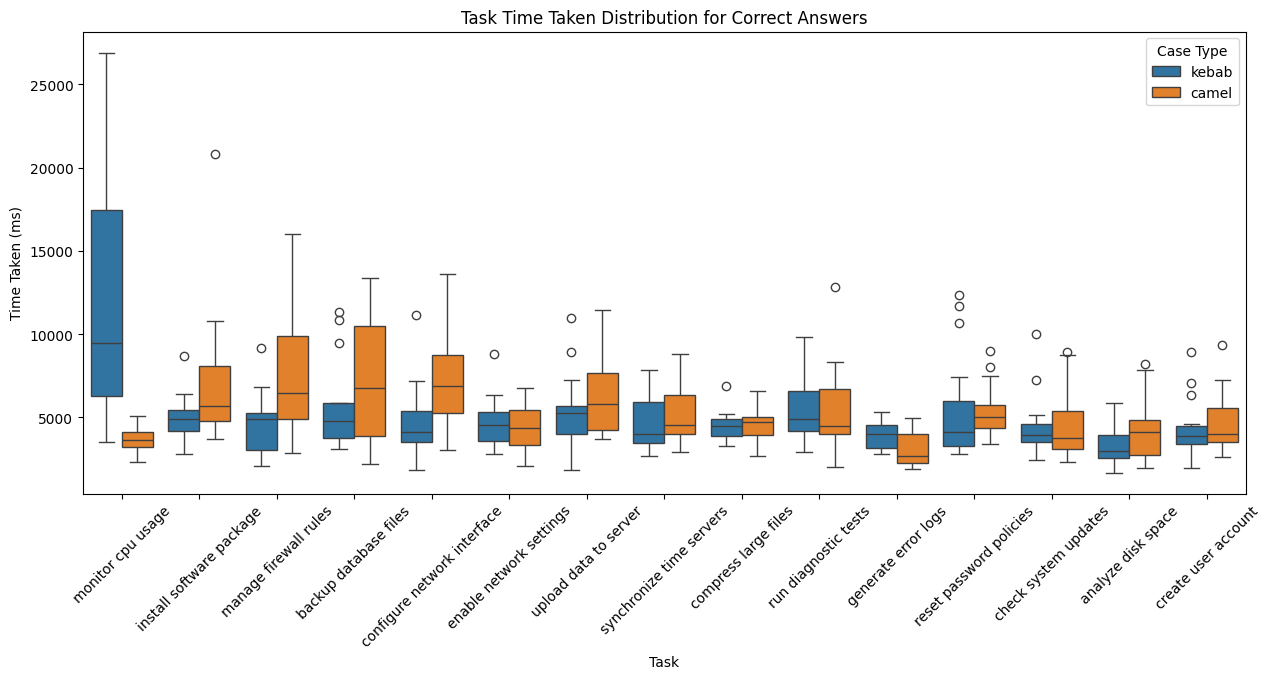

In [143]:
# Display Tasks with Case type and time taken (min, max, mean) but only for correct answers
plt.figure(figsize=(15, 6))
sns.boxplot(x='Task', y='Time Taken (ms)', hue='Case Type', data=df[df['Correct'] == 1])
plt.title('Task Time Taken Distribution for Correct Answers')
plt.xlabel('Task')
plt.ylabel('Time Taken (ms)')
plt.xticks(rotation=45)
plt.legend(title='Case Type')
plt.show()

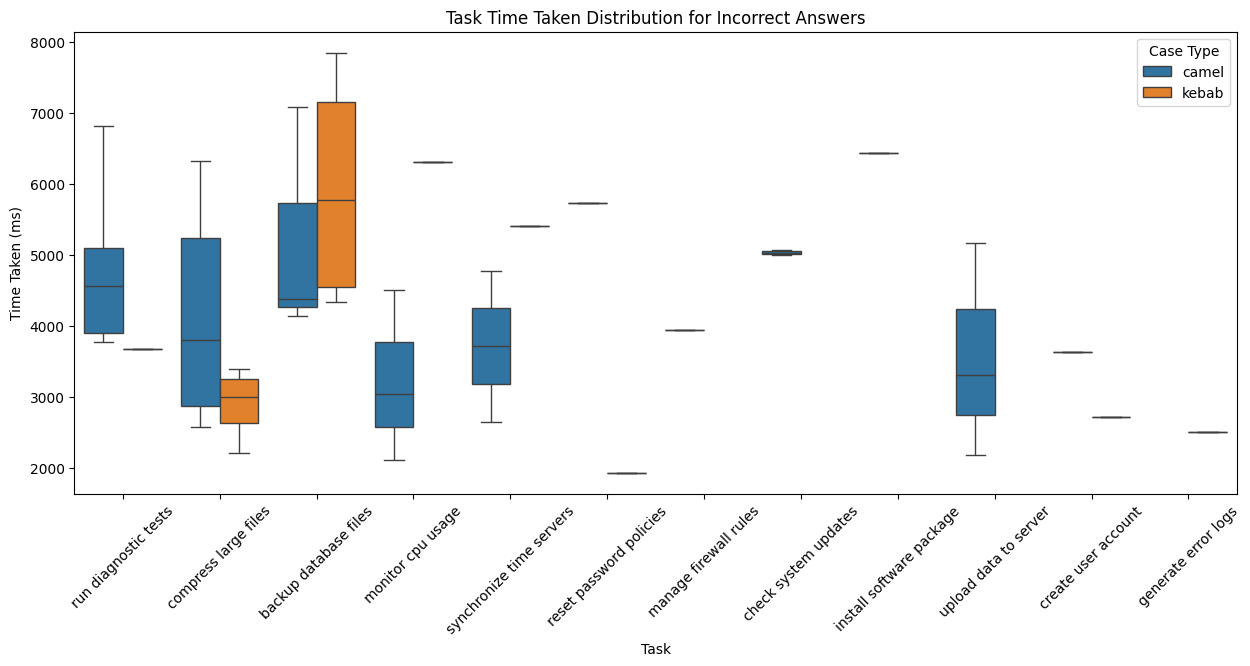

In [144]:
# Display Tasks with Case type and time taken (min, max, mean) but only for incorrect answers
plt.figure(figsize=(15, 6))
sns.boxplot(x='Task', y='Time Taken (ms)', hue='Case Type', data=df[df['Correct'] == 0])
plt.title('Task Time Taken Distribution for Incorrect Answers')
plt.xlabel('Task')
plt.ylabel('Time Taken (ms)')
plt.xticks(rotation=45)
plt.legend(title='Case Type')
plt.show()

---

### Demographic 

In [192]:
# demographics: 'Age', 'English level', 'Education Level', 'Computing Experience'

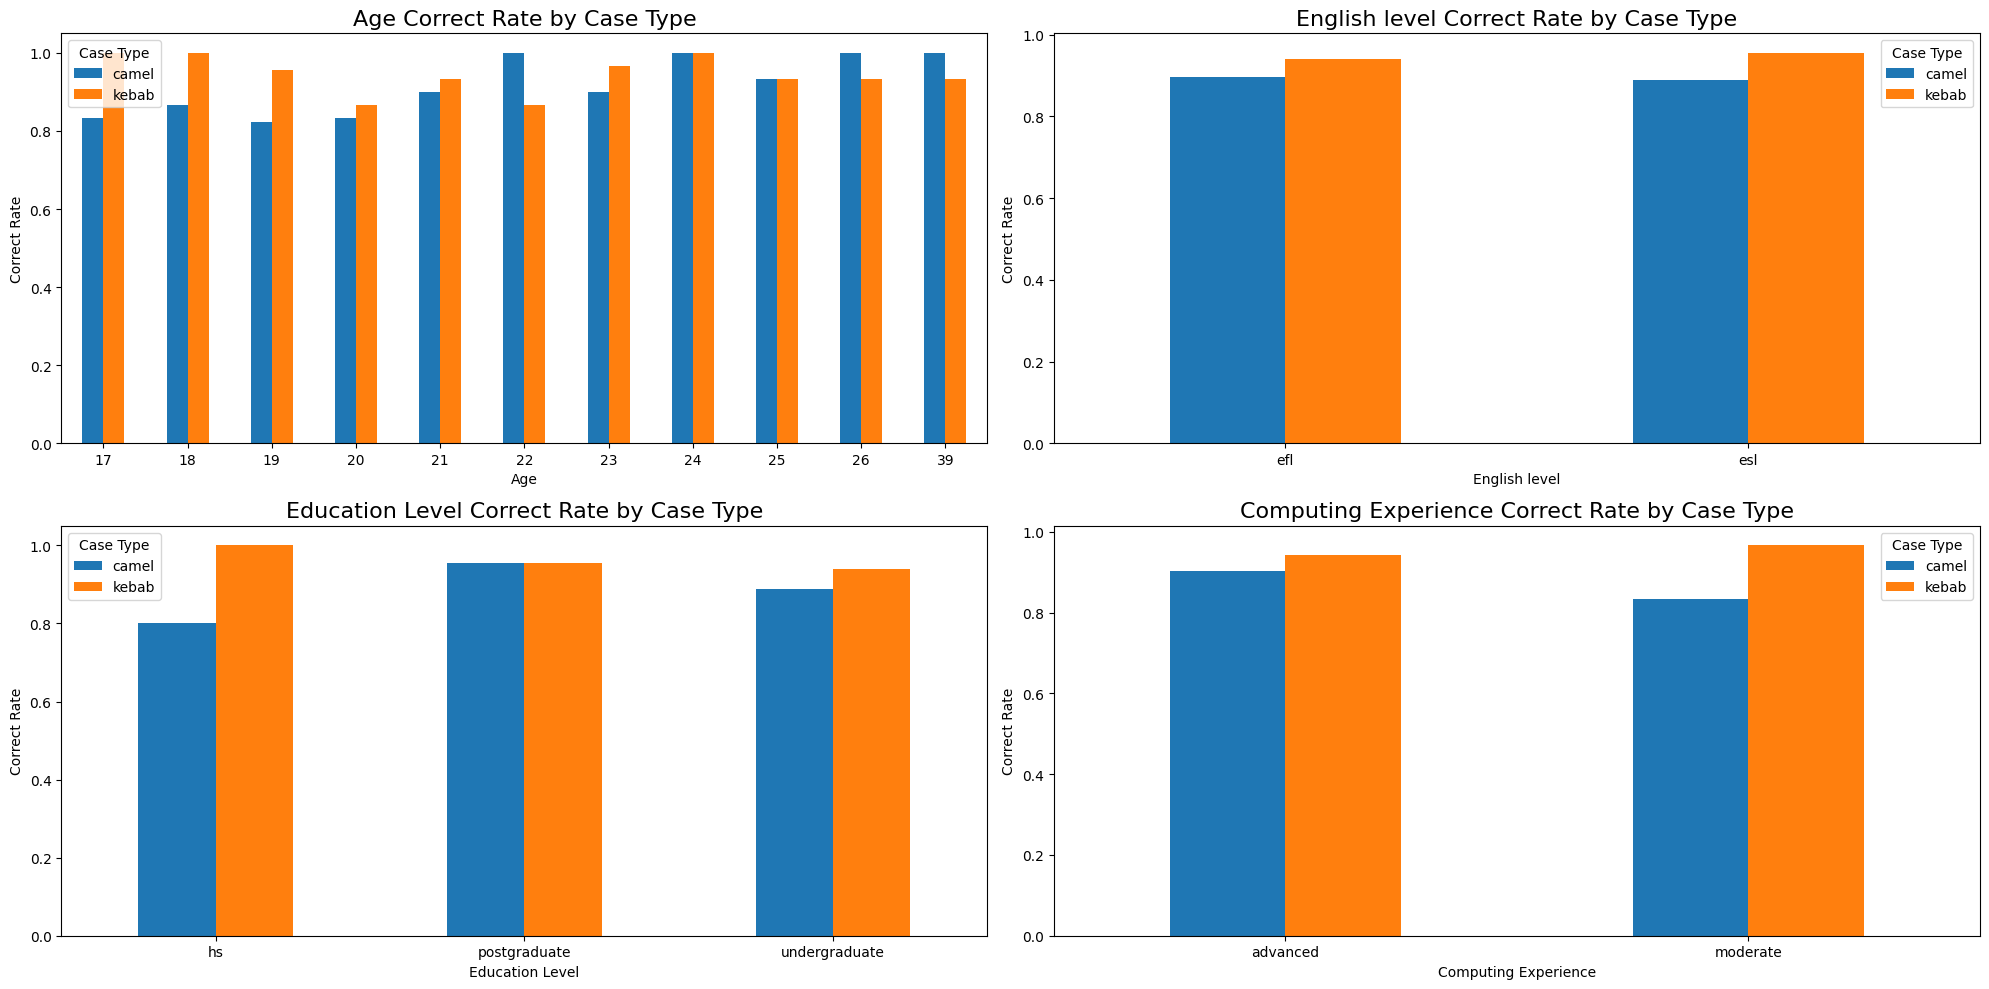

In [193]:
# Display distribution of Age, English level, Education Level, Computing Experience for correct rate
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

df.groupby(['Age', 'Case Type'])['Correct'].mean().unstack().plot.bar(ax=axes[0, 0])
axes[0, 0].set_title('Age Correct Rate by Case Type', fontsize=16)
axes[0, 0].set_ylabel('Correct Rate')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

df.groupby(['English level', 'Case Type'])['Correct'].mean().unstack().plot.bar(ax=axes[0, 1])
axes[0, 1].set_title('English level Correct Rate by Case Type', fontsize=16)
axes[0, 1].set_ylabel('Correct Rate')
axes[0, 1].set_xlabel('English level')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

df.groupby(['Education Level', 'Case Type'])['Correct'].mean().unstack().plot.bar(ax=axes[1, 0])
axes[1, 0].set_title('Education Level Correct Rate by Case Type', fontsize=16)
axes[1, 0].set_ylabel('Correct Rate')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

df.groupby(['Computing Experience', 'Case Type'])['Correct'].mean().unstack().plot.bar(ax=axes[1, 1])
axes[1, 1].set_title('Computing Experience Correct Rate by Case Type', fontsize=16)
axes[1, 1].set_ylabel('Correct Rate')
axes[1, 1].set_xlabel('Computing Experience')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


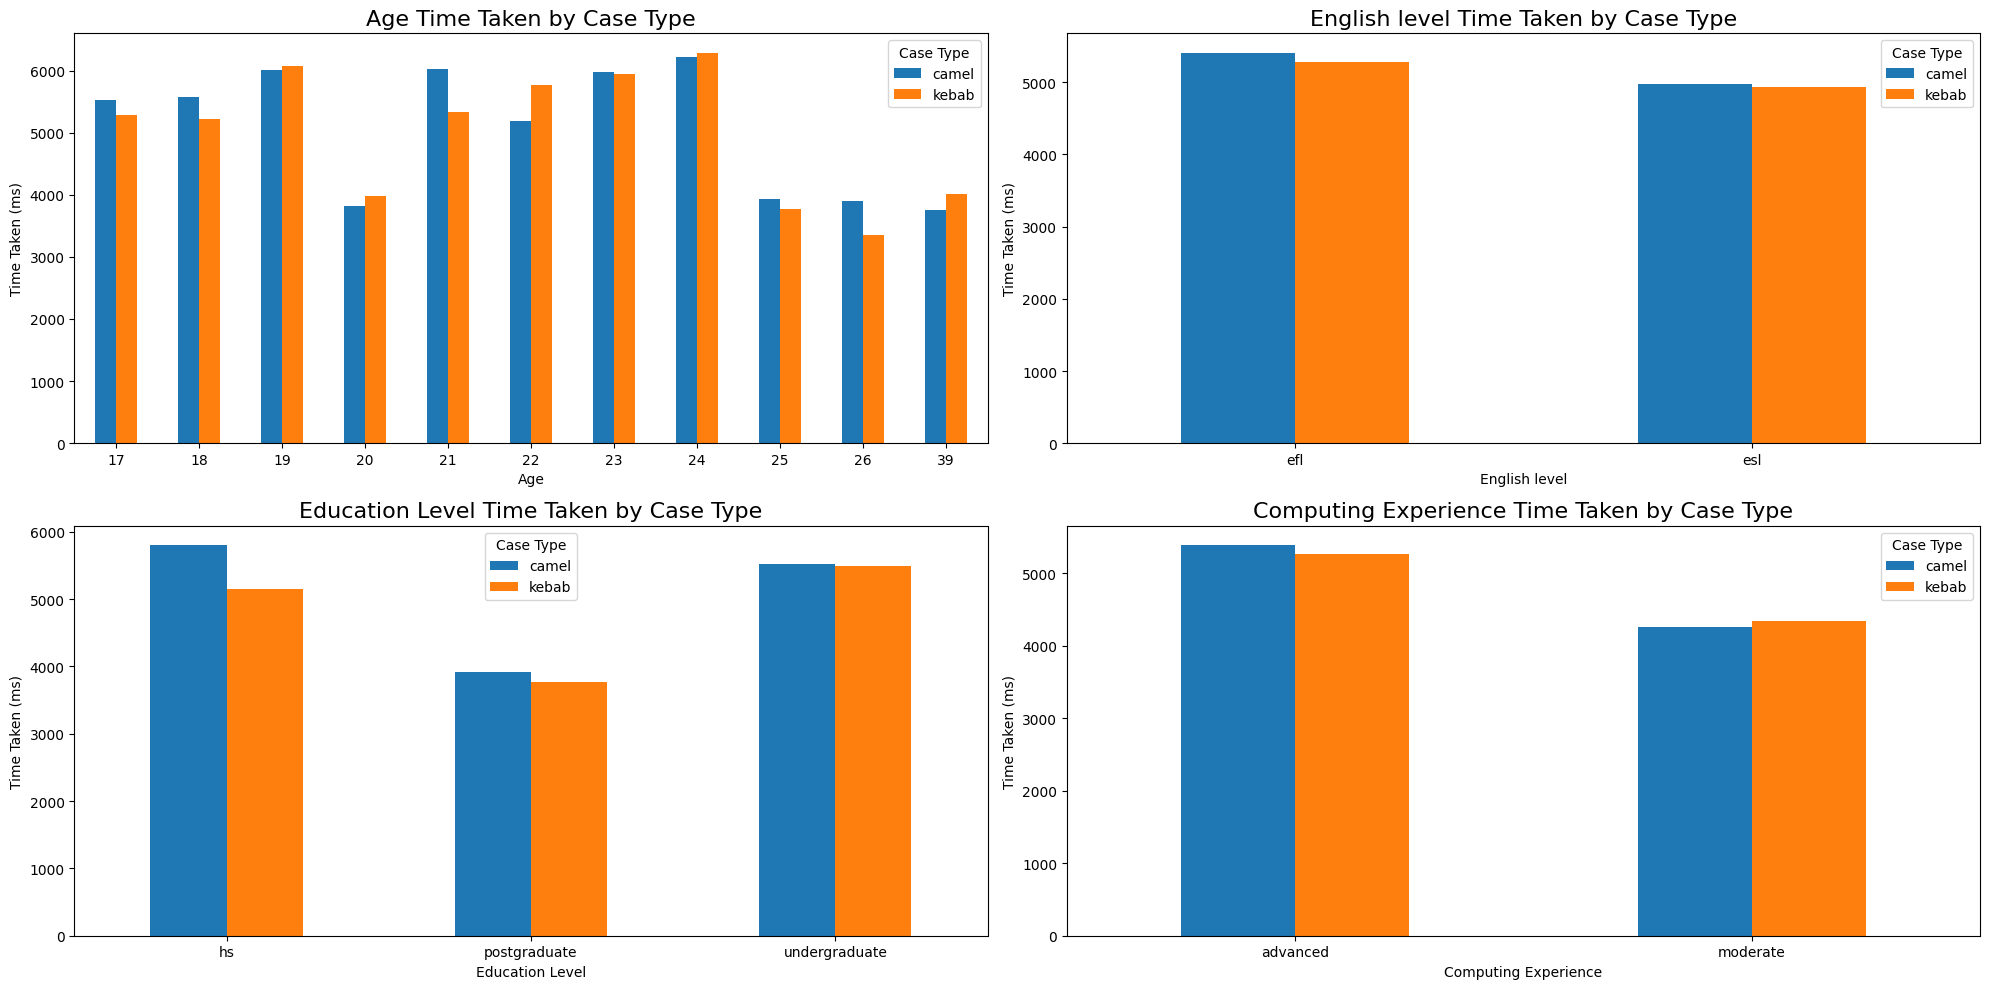

In [194]:
# Display distribution of Age, English level, Education Level, Computing Experience for time taken
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

df.groupby(['Age', 'Case Type'])['Time Taken (ms)'].mean().unstack().plot.bar(ax=axes[0, 0])
axes[0, 0].set_title('Age Time Taken by Case Type', fontsize=16)
axes[0, 0].set_ylabel('Time Taken (ms)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

df.groupby(['English level', 'Case Type'])['Time Taken (ms)'].mean().unstack().plot.bar(ax=axes[0, 1])
axes[0, 1].set_title('English level Time Taken by Case Type', fontsize=16)
axes[0, 1].set_ylabel('Time Taken (ms)')
axes[0, 1].set_xlabel('English level')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

df.groupby(['Education Level', 'Case Type'])['Time Taken (ms)'].mean().unstack().plot.bar(ax=axes[1, 0])
axes[1, 0].set_title('Education Level Time Taken by Case Type', fontsize=16)
axes[1, 0].set_ylabel('Time Taken (ms)')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

df.groupby(['Computing Experience', 'Case Type'])['Time Taken (ms)'].mean().unstack().plot.bar(ax=axes[1, 1])
axes[1, 1].set_title('Computing Experience Time Taken by Case Type', fontsize=16)
axes[1, 1].set_ylabel('Time Taken (ms)')
axes[1, 1].set_xlabel('Computing Experience')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

---

# Descriptive Statistics

In [257]:
def format_discriptive(data):
  return data.map(lambda y: f'{y:.1f}' if y > 999 else f'{y:.2f}').map(lambda y: y.rstrip('0').rstrip('.') if '.' in y else y)

In [258]:
# Desciptive statistics for time taken
format_discriptive(df.groupby('Case Type')['Time Taken (ms)'].describe())

,count,mean,std,min,25%,50%,75%,max
Case Type,,,,,,,,
camel,255,5251.9,2592.8,1895,3686,4508,6418,20836
kebab,255,5160,3194.7,1695,3417.5,4438,5576.5,26919


In [259]:
# Desciptive statistics for correct rate
format_discriptive(df.groupby('Case Type')['Correct'].describe())

,count,mean,std,min,25%,50%,75%,max
Case Type,,,,,,,,
camel,255,0.89,0.31,0,1,1,1,1
kebab,255,0.95,0.23,0,1,1,1,1


In [260]:
# Desciptive statistics for time taken for each task
format_discriptive(df.groupby('Task')['Time Taken (ms)'].describe())

,count,mean,std,min,25%,50%,75%,max
Task,,,,,,,,
analyze disk space,34,3775.6,1582.3,1695,2665,3547,4482.5,8201
backup database files,34,6272.4,3014.2,2215,4157,4885,7843,13380
check system updates,34,4561.9,1898.9,2315,3477.2,4025,5032,10018
compress large files,34,4271.1,1158.3,2219,3346.5,4346,5014.8,6903
configure network interface,34,5946.6,2640.2,1847,3878,5374.5,7591,13622
create user account,34,4392.9,1784.2,1980,3493,3863.5,4564.2,9368
enable network settings,34,4597.2,1430.6,2091,3504.8,4479.5,5419,8839
generate error logs,34,3524.9,1021.3,1895,2653.5,3711,4395.2,5319
install software package,34,6004.3,3180.2,2817,4616.2,5360,6388.2,20836


In [261]:
# Desciptive statistics for demograhics
format_discriptive(df.groupby('Age')['Time Taken (ms)'].describe())

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
17,60,5401.6,2095,2117,3972.8,5063,6353.5,11810
18,30,5397.8,3205.6,2116,3209.5,4545.5,6208.8,17204
19,90,6046.3,3023.5,2685,4157.5,5023,6863,18285
20,60,3900.3,2586.1,1695,2706.2,3569,4379,21146
21,60,5685.1,2426.3,1966,4078,5055.5,7037.8,13622
22,30,5475.7,3675.7,1936,3727.2,4756.5,6377.2,22758
23,60,5954.6,4348.4,1706,3758.5,4434,6802.8,26919
24,30,6249.4,2019.3,3705,4997.5,6064.5,7050.8,12340
25,30,3847.2,1428.1,1897,2855,3633.5,4345.5,7451


In [262]:
format_discriptive(df.groupby('English level')['Time Taken (ms)'].describe())

,count,mean,std,min,25%,50%,75%,max
English level,,,,,,,,
efl,330,5345.2,2746.2,1836,3627.5,4692.5,6325,22758
esl,180,4950.7,3172.7,1695,3436.2,4142,5245.8,26919


In [228]:
format_discriptive(df.groupby('Education Level')['Time Taken (ms)'].describe())

,count,mean,std,min,25%,50%,75%,max
Education Level,,,,,,,,
hs,30,5473.57,1934.09,3025,4129,5063,6324.25,11472
postgraduate,90,3840.01,1169.49,1706,3072.75,3729,4478,8024
undergraduate,390,5500.57,3152.91,1695,3640.75,4692.5,6430.75,26919


In [263]:
format_discriptive(df.groupby('Computing Experience')['Time Taken (ms)'].describe())

,count,mean,std,min,25%,50%,75%,max
Computing Experience,,,,,,,,
advanced,450,5326.8,2928.2,1836,3606.8,4555,6300.2,26919
moderate,60,4299.9,2589,1695,3010.8,3866.5,4742.8,21146


---